In [1]:
## import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

## 1. Reading Data

In [2]:
##importing the dataset
churn_data = pd.read_csv("churn_data.csv")
churn_data.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
## importing the customer data
customer_data = pd.read_csv("customer_data.csv")
customer_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No


In [4]:
## importing  the internet data
internet_data = pd.read_csv("internet_data.csv")
internet_data.head()

,customerID,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,No,Fiber optic,No,No,No,No,No,No


In [5]:
## merging all the dataframes above on customerID
df1 = pd.merge(churn_data,customer_data,how="inner",on="customerID")
telecom = pd.merge(df1,internet_data,how="inner",on="customerID")
telecom.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,...,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,Female,...,Yes,No,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.5,No,Male,...,No,No,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,Male,...,No,No,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,Male,...,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,Female,...,No,No,No,Fiber optic,No,No,No,No,No,No


# 2. Data Understanding

In [6]:
##getting the shape
telecom.shape

(7043, 21)

In [7]:
telecom.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
dtypes: float64(1), int64(2), obj

We observe 0 missing data

In [8]:
## lets see the dtypes
telecom.dtypes

customerID           object
tenure                int64
PhoneService         object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
dtype: object

In [9]:
telecom.describe()

,tenure,MonthlyCharges,SeniorCitizen
count,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,0.162147
std,24.559481,30.090047,0.368612
min,0.000000,18.250000,0.000000
25%,9.000000,35.500000,0.000000
50%,29.000000,70.350000,0.000000
75%,55.000000,89.850000,0.000000
max,72.000000,118.750000,1.000000


## 3. Data Preparation

Convert variables which have data like Yes/No to 0/1

In [10]:
## list of variables to map 
var_list = ['PhoneService','PaperlessBilling','Churn','Partner','Dependents']

## defining the binary_map function
def binary_map(x):
    return x.map({'Yes':1,"No":0})

## applying that function to the housing list
telecom[var_list] = telecom[var_list].apply(binary_map)

In [11]:
telecom.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,...,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,1,0,Month-to-month,1,Electronic check,29.85,29.85,0,Female,...,1,0,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,34,1,One year,0,Mailed check,56.95,1889.5,0,Male,...,0,0,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,2,1,Month-to-month,1,Mailed check,53.85,108.15,1,Male,...,0,0,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,45,0,One year,0,Bank transfer (automatic),42.30,1840.75,0,Male,...,0,0,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,2,1,Month-to-month,1,Electronic check,70.70,151.65,1,Female,...,0,0,No,Fiber optic,No,No,No,No,No,No


#### create dummies for categorical variables with multiple levels

In [12]:
dummy1 = pd.get_dummies(telecom[['Contract','PaymentMethod','gender','InternetService']],drop_first=True)


#concat with the orginal
telecom = pd.concat([telecom,dummy1],axis=1)

##dropping the older variables
telecom.drop(columns=['Contract','PaymentMethod','gender','InternetService'],inplace=True)

telecom.head()

,customerID,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,SeniorCitizen,Partner,Dependents,...,StreamingTV,StreamingMovies,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,gender_Male,InternetService_Fiber optic,InternetService_No
0,7590-VHVEG,1,0,1,29.85,29.85,0,0,1,0,...,No,No,0,0,0,1,0,0,0,0
1,5575-GNVDE,34,1,0,56.95,1889.5,0,0,0,0,...,No,No,1,0,0,0,1,1,0,0
2,3668-QPYBK,2,1,1,53.85,108.15,1,0,0,0,...,No,No,0,0,0,0,1,1,0,0
3,7795-CFOCW,45,0,0,42.30,1840.75,0,0,0,0,...,No,No,1,0,0,0,0,1,0,0
4,9237-HQITU,2,1,1,70.70,151.65,1,0,0,0,...,No,No,0,0,0,1,0,0,1,0


In [13]:
##creating dummies for other variables

##dummies for MultipleLines
ml = pd.get_dummies(telecom["MultipleLines"],prefix="MultipleLines")
##removing the No service, thats why we didnot use drop_first=true
ml1 = ml.drop("MultipleLines_No phone service",axis = 1)
## addind to the master dataframe
telecom = pd.concat([telecom,ml1],axis = 1)
## Phone service already tells if there is phone service or no, so we can drop that vategory

##dummies for OnlineSecurity
os = pd.get_dummies(telecom["OnlineSecurity"],prefix="OnlineSecurity")
##removing the No service, thats why we didnot use drop_first=true
os1 = os.drop("OnlineSecurity_No internet service",axis = 1)
## addind to the master dataframe
telecom = pd.concat([telecom,os1],axis = 1)


##dummies for OnlineBackup
ob = pd.get_dummies(telecom["OnlineBackup"],prefix="OnlineBackup")
##removing the No service, thats why we didnot use drop_first=true
ob1 = ob.drop("OnlineBackup_No internet service",axis = 1)
## addind to the master dataframe
telecom = pd.concat([telecom,ob1],axis = 1)


##dummies for DeviceProtection
dp = pd.get_dummies(telecom["DeviceProtection"],prefix="DeviceProtection")
##removing the No service, thats why we didnot use drop_first=true
dp1 = dp.drop("DeviceProtection_No internet service",axis = 1)
## addind to the master dataframe
telecom = pd.concat([telecom,dp1],axis = 1)


##dummies for TechSupport
ts = pd.get_dummies(telecom["TechSupport"],prefix="TechSupport")
##removing the No service, thats why we didnot use drop_first=true
ts1 = ts.drop("TechSupport_No internet service",axis = 1)
## addind to the master dataframe
telecom = pd.concat([telecom,ts1],axis = 1)


##dummies for StreamingTV
st = pd.get_dummies(telecom["StreamingTV"],prefix="StreamingTV")
##removing the No service, thats why we didnot use drop_first=true
st1 = st.drop("StreamingTV_No internet service",axis = 1)
## addind to the master dataframe
telecom = pd.concat([telecom,st1],axis = 1)


##dummies for StreamingMovies
sm = pd.get_dummies(telecom["StreamingMovies"],prefix="StreamingMovies")
##removing the No service, thats why we didnot use drop_first=true
sm1 = sm.drop("StreamingMovies_No internet service",axis = 1)
## addind to the master dataframe
telecom = pd.concat([telecom,sm1],axis = 1)

In [14]:
## remove the redundant/orginal columns
telecom.drop(columns=["MultipleLines","OnlineSecurity","OnlineBackup","DeviceProtection","TechSupport","StreamingTV","StreamingMovies"],inplace=True)

In [15]:
##print the final shape
telecom.shape

(7043, 32)

In [16]:
telecom.TotalCharges.dtype

dtype('O')

In [17]:
## charges should be a number,  lets use the below method to handle nans as well
telecom.TotalCharges = telecom.TotalCharges.convert_objects(convert_numeric=True)

In [18]:
telecom.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 32 columns):
customerID                               7043 non-null object
tenure                                   7043 non-null int64
PhoneService                             7043 non-null int64
PaperlessBilling                         7043 non-null int64
MonthlyCharges                           7043 non-null float64
TotalCharges                             7032 non-null float64
Churn                                    7043 non-null int64
SeniorCitizen                            7043 non-null int64
Partner                                  7043 non-null int64
Dependents                               7043 non-null int64
Contract_One year                        7043 non-null uint8
Contract_Two year                        7043 non-null uint8
PaymentMethod_Credit card (automatic)    7043 non-null uint8
PaymentMethod_Electronic check           7043 non-null uint8
PaymentMethod_Mailed check        

## Checking for Outliers as they affect regression models

In [19]:
num_telecom = telecom[['tenure','MonthlyCharges','SeniorCitizen','TotalCharges']]
num_telecom.describe(percentiles=[0.25,0.5,0.75,0.90,0.95,0.99])

,tenure,MonthlyCharges,SeniorCitizen,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,32.371149,64.761692,0.162147,2283.300441
std,24.559481,30.090047,0.368612,2266.771362
min,0.000000,18.250000,0.000000,18.800000
25%,9.000000,35.500000,0.000000,401.450000
50%,29.000000,70.350000,0.000000,1397.475000
75%,55.000000,89.850000,0.000000,3794.737500
90%,69.000000,102.600000,1.000000,5976.640000
95%,72.000000,107.400000,1.000000,6923.590000
99%,72.000000,114.729000,1.000000,8039.883000


##### No outliers!!

In [20]:
#Check the missing values
telecom.isnull().sum()

customerID                                0
tenure                                    0
PhoneService                              0
PaperlessBilling                          0
MonthlyCharges                            0
TotalCharges                             11
Churn                                     0
SeniorCitizen                             0
Partner                                   0
Dependents                                0
Contract_One year                         0
Contract_Two year                         0
PaymentMethod_Credit card (automatic)     0
PaymentMethod_Electronic check            0
PaymentMethod_Mailed check                0
gender_Male                               0
InternetService_Fiber optic               0
InternetService_No                        0
MultipleLines_No                          0
MultipleLines_Yes                         0
OnlineSecurity_No                         0
OnlineSecurity_Yes                        0
OnlineBackup_No                 

In [21]:
## drop those 11 records
telecom = telecom[~telecom.TotalCharges.isnull()]

In [22]:
telecom.isnull().sum()

customerID                               0
tenure                                   0
PhoneService                             0
PaperlessBilling                         0
MonthlyCharges                           0
TotalCharges                             0
Churn                                    0
SeniorCitizen                            0
Partner                                  0
Dependents                               0
Contract_One year                        0
Contract_Two year                        0
PaymentMethod_Credit card (automatic)    0
PaymentMethod_Electronic check           0
PaymentMethod_Mailed check               0
gender_Male                              0
InternetService_Fiber optic              0
InternetService_No                       0
MultipleLines_No                         0
MultipleLines_Yes                        0
OnlineSecurity_No                        0
OnlineSecurity_Yes                       0
OnlineBackup_No                          0
OnlineBacku

# Train-Test Split

In [23]:
from sklearn.model_selection import train_test_split


In [24]:
## create data, remove target and index variables from train data
X = telecom.drop(columns=['Churn','customerID'])
y = telecom['Churn']

In [25]:
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.7,test_size=0.3,random_state=100)

# Feature Scaling

In [26]:
from sklearn.preprocessing import StandardScaler

In [27]:
## lets look at the data
telecom.head()

,customerID,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,SeniorCitizen,Partner,Dependents,...,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes
0,7590-VHVEG,1,0,1,29.85,29.85,0,0,1,0,...,0,1,1,0,1,0,1,0,1,0
1,5575-GNVDE,34,1,0,56.95,1889.50,0,0,0,0,...,1,0,0,1,1,0,1,0,1,0
2,3668-QPYBK,2,1,1,53.85,108.15,1,0,0,0,...,0,1,1,0,1,0,1,0,1,0
3,7795-CFOCW,45,0,0,42.30,1840.75,0,0,0,0,...,1,0,0,1,0,1,1,0,1,0
4,9237-HQITU,2,1,1,70.70,151.65,1,0,0,0,...,1,0,1,0,1,0,1,0,1,0


In [28]:
scaler = StandardScaler()
X_train[['tenure','MonthlyCharges','TotalCharges']] = scaler.fit_transform(X_train[['tenure','MonthlyCharges','TotalCharges']])
X_train.head()

,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,SeniorCitizen,Partner,Dependents,Contract_One year,Contract_Two year,...,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes
879,0.019693,1,1,-0.338074,-0.276449,0,0,0,0,0,...,0,1,1,0,1,0,1,0,1,0
5790,0.305384,0,1,-0.464443,-0.112702,0,1,1,0,0,...,0,1,1,0,1,0,0,1,0,1
6498,-1.286319,1,1,0.581425,-0.974430,0,0,0,0,0,...,0,1,0,1,1,0,1,0,1,0
880,-0.919003,1,1,1.505913,-0.550676,0,0,0,0,0,...,0,1,0,1,0,1,0,1,0,1
2784,-1.163880,1,1,1.106854,-0.835971,0,0,1,0,0,...,1,0,0,1,0,1,0,1,0,1


In [29]:
##churn rate
telecom.Churn.sum()/telecom.shape[0] * 100

26.578498293515356

### Looking at the Correlations

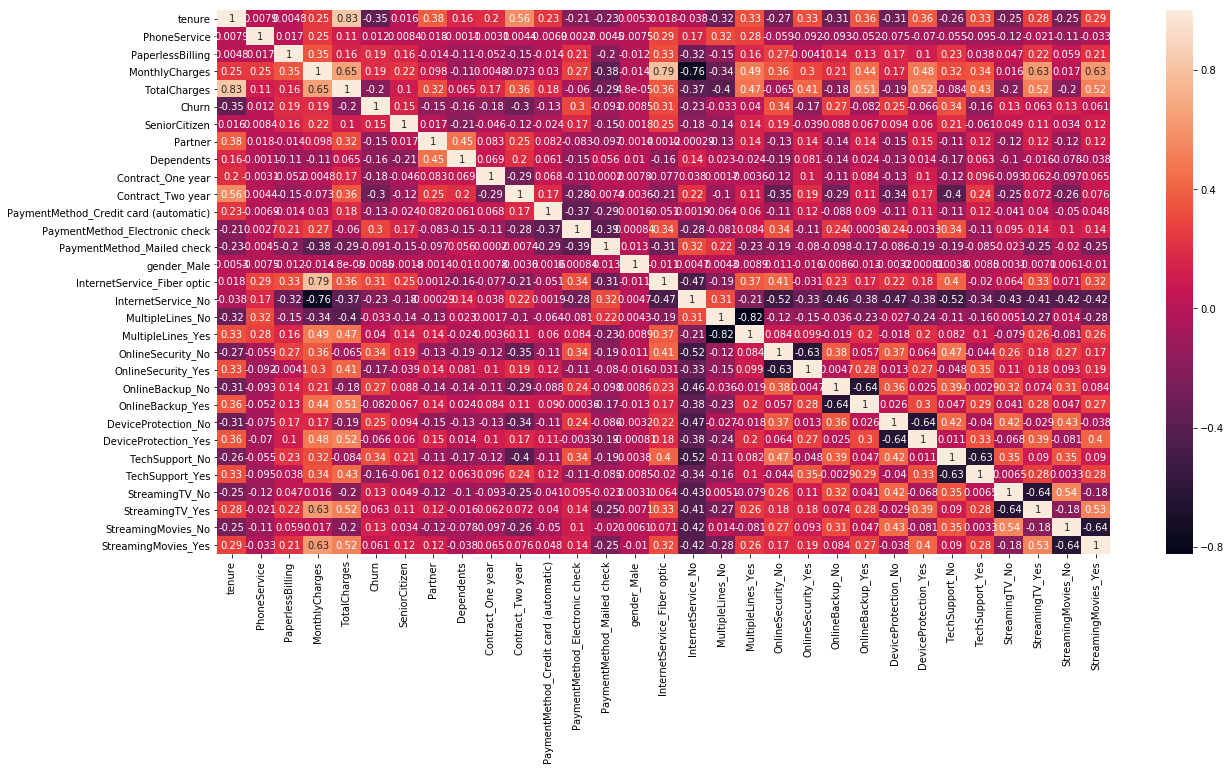

In [30]:
plt.figure(figsize=(20,10))
sns.heatmap(telecom.corr(),annot=True)

In [31]:
## Dropping highly correlated variables, we see a good cluster of highly correlated values in the below variable. Business context will help more here
vars_to_drop = ["MultipleLines_No","OnlineSecurity_No","OnlineBackup_No","DeviceProtection_No","StreamingTV_No","StreamingMovies_No","TechSupport_No"]

X_test = X_test.drop(columns=vars_to_drop)
X_train = X_train.drop(columns=vars_to_drop)

#### Running the first training model

In [32]:
import statsmodels.api as sm

In [33]:
## logistic regression model
X_train_sm = sm.add_constant(X_train)
logm1 = sm.GLM(y_train,X_train_sm,family=sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4922
Model:                            GLM   Df Residuals:                     4898
Model Family:                Binomial   Df Model:                           23
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2004.7
Date:                Tue, 01 Jun 2021   Deviance:                       4009.4
Time:                        22:39:05   Pearson chi2:                 6.07e+03
No. Iterations:                     7   Covariance Type:             nonrobust
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -3.9382      1.546     -2.547      0.011      -6.969      -0.908
tenure                                   -1.5172      0.189     -8.015      0.000      -1.888      -1.146
PhoneService                              0.9507      0.789      1.205      0.228      -0.595       2.497
PaperlessBilling                          0.3254      0.090      3.614      0.000       0.149       0.502
MonthlyCharges                           -2.1806      1.160     -1.880      0.060      -4.454       0.092
TotalCharges                              0.7332      0.198      3.705      0.000       0.345       1.121
SeniorCitizen                             0.3984      0.102      3.924      0.000       0.199       0.597
Partner                                   0.0374      0.094      0.399      0.690      -0.146       0.221
Dependents                               -0.1430      0.107     -1.332      0.183      -0.353       0.067
Contract_One year                        -0.6578      0.129     -5.106      0.000      -0.910      -0.405
Contract_Two year                        -1.2455      0.212     -5.874      0.000      -1.661      -0.830
PaymentMethod_Credit card (automatic)    -0.2577      0.137     -1.883      0.060      -0.526       0.011
PaymentMethod_Electronic check            0.1615      0.113      1.434      0.152      -0.059       0.382
PaymentMethod_Mailed check               -0.2536      0.137     -1.845      0.065      -0.523       0.016
gender_Male                              -0.0346      0.078     -0.442      0.658      -0.188       0.119
InternetService_Fiber optic               2.5124      0.967      2.599      0.009       0.618       4.407
InternetService_No                       -2.7792      0.982     -2.831      0.005      -4.703      -0.855
MultipleLines_Yes                         0.5623      0.214      2.628      0.009       0.143       0.982
OnlineSecurity_Yes                       -0.0245      0.216     -0.113      0.910      -0.448       0.399
OnlineBackup_Yes                          0.1740      0.212      0.822      0.411      -0.241       0.589
DeviceProtection_Yes                      0.3229      0.215      1.501      0.133      -0.099       0.744
TechSupport_Yes                          -0.0305      0.216     -0.141      0.888      -0.455       0.394
StreamingTV_Yes                           0.9598      0.396      2.423      0.015       0.183       1.736
StreamingMovies_Yes                       0.8484      0.396      2.143      0.032       0.072       1.624
=========================================================================================================
"""

#### If we see p-values above, we see there are lot of larger p-values , so there is a good scope to eliminate a lot of features

## RFE

In [34]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [35]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg,15)
rfe = rfe.fit(X_train,y_train)

In [36]:
rfe.support_

array([ True,  True,  True, False,  True,  True, False, False,  True,
        True,  True, False,  True, False,  True,  True,  True,  True,
       False, False,  True,  True, False])

In [37]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('tenure', True, 1),
 ('PhoneService', True, 1),
 ('PaperlessBilling', True, 1),
 ('MonthlyCharges', False, 6),
 ('TotalCharges', True, 1),
 ('SeniorCitizen', True, 1),
 ('Partner', False, 8),
 ('Dependents', False, 4),
 ('Contract_One year', True, 1),
 ('Contract_Two year', True, 1),
 ('PaymentMethod_Credit card (automatic)', True, 1),
 ('PaymentMethod_Electronic check', False, 3),
 ('PaymentMethod_Mailed check', True, 1),
 ('gender_Male', False, 9),
 ('InternetService_Fiber optic', True, 1),
 ('InternetService_No', True, 1),
 ('MultipleLines_Yes', True, 1),
 ('OnlineSecurity_Yes', True, 1),
 ('OnlineBackup_Yes', False, 2),
 ('DeviceProtection_Yes', False, 7),
 ('TechSupport_Yes', True, 1),
 ('StreamingTV_Yes', True, 1),
 ('StreamingMovies_Yes', False, 5)]

In [39]:
col = X_train.columns[rfe.support_]

In [40]:
##excluded columns
X_train.columns[~rfe.support_]

Index(['MonthlyCharges', 'Partner', 'Dependents',
       'PaymentMethod_Electronic check', 'gender_Male', 'OnlineBackup_Yes',
       'DeviceProtection_Yes', 'StreamingMovies_Yes'],
      dtype='object')

### Assessing the model with StatsModels

In [41]:
X_train_sm = sm.add_constant(X_train[col]) ## using the selected features
logm2 = sm.GLM(y_train,X_train_sm,family=sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4922
Model:                            GLM   Df Residuals:                     4906
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2011.8
Date:                Tue, 01 Jun 2021   Deviance:                       4023.5
Time:                        23:28:19   Pearson chi2:                 6.22e+03
No. Iterations:                     7   Covariance Type:             nonrobust
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -1.0343      0.171     -6.053      0.000      -1.369      -0.699
tenure                                   -1.5386      0.184     -8.381      0.000      -1.898      -1.179
PhoneService                             -0.5231      0.161     -3.256      0.001      -0.838      -0.208
PaperlessBilling                          0.3397      0.090      3.789      0.000       0.164       0.515
TotalCharges                              0.7116      0.188      3.794      0.000       0.344       1.079
SeniorCitizen                             0.4294      0.100      4.312      0.000       0.234       0.625
Contract_One year                        -0.6813      0.128     -5.334      0.000      -0.932      -0.431
Contract_Two year                        -1.2680      0.211     -6.011      0.000      -1.681      -0.855
PaymentMethod_Credit card (automatic)    -0.3775      0.113     -3.352      0.001      -0.598      -0.157
PaymentMethod_Mailed check               -0.3760      0.111     -3.389      0.001      -0.594      -0.159
InternetService_Fiber optic               0.7421      0.117      6.317      0.000       0.512       0.972
InternetService_No                       -0.9385      0.166     -5.650      0.000      -1.264      -0.613
MultipleLines_Yes                         0.2086      0.096      2.181      0.029       0.021       0.396
OnlineSecurity_Yes                       -0.4049      0.102     -3.968      0.000      -0.605      -0.205
TechSupport_Yes                          -0.3967      0.102     -3.902      0.000      -0.596      -0.197
StreamingTV_Yes                           0.2747      0.094      2.911      0.004       0.090       0.460
=========================================================================================================
"""

All the p values are les than 0.05

In [42]:
## lets get the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred.head()

879     0.225111
5790    0.274893
6498    0.692126
880     0.504909
2784    0.645261
dtype: float64

In [43]:
## convert y_train_pred to np array
y_train_pred = y_train_pred.values.reshape(-1)

### Creating a dataframe with the churn and the probability of the churn

In [44]:
y_train_pred_final = pd.DataFrame({"Churn":y_train.values,'Churn_Prob':y_train_pred})
y_train_pred_final["CustID"] = y_train.index
y_train_pred_final.head()

,Churn,Churn_Prob,CustID
0,0,0.225111,879
1,0,0.274893,5790
2,1,0.692126,6498
3,1,0.504909,880
4,1,0.645261,2784


### Creating a new column predicted which will have 1 if >0.5 else 0

In [45]:
y_train_pred_final['predicted'] = y_train_pred_final.Churn_Prob.apply(lambda x: 1 if x > 0.5 else 0)

In [47]:
y_train_pred_final.head()

,Churn,Churn_Prob,CustID,predicted
0,0,0.225111,879,0
1,0,0.274893,5790,0
2,1,0.692126,6498,1
3,1,0.504909,880,1
4,1,0.645261,2784,1


In [48]:
from sklearn import metrics

In [49]:
#confusion matrix
confusion = metrics.confusion_matrix(y_train_pred_final.Churn,y_train_pred_final.predicted)
confusion

array([[3270,  365],
       [ 579,  708]], dtype=int64)

In [50]:
# lets print accuracy score 
print(metrics.accuracy_score(y_train_pred_final.Churn,y_train_pred_final.predicted))

0.8082080455099553


#### Checking VIFs

In [52]:
## importing the VIF fnction from sklearn
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [53]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,PhoneService,8.86
3,TotalCharges,7.37
0,tenure,6.88
9,InternetService_Fiber optic,3.97
6,Contract_Two year,3.28
10,InternetService_No,3.25
2,PaperlessBilling,2.68
11,MultipleLines_Yes,2.53
14,StreamingTV_Yes,2.34
13,TechSupport_Yes,2.08


In [54]:
## lets drop PhoneService as it has VIF > 5
col = col.drop('PhoneService',1)
col

Index(['tenure', 'PaperlessBilling', 'TotalCharges', 'SeniorCitizen',
       'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Credit card (automatic)', 'PaymentMethod_Mailed check',
       'InternetService_Fiber optic', 'InternetService_No',
       'MultipleLines_Yes', 'OnlineSecurity_Yes', 'TechSupport_Yes',
       'StreamingTV_Yes'],
      dtype='object')

In [55]:
## retrain after dropping
X_train_sm = sm.add_constant(X_train[col]) ## using the selected features
logm3 = sm.GLM(y_train,X_train_sm,family=sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4922
Model:                            GLM   Df Residuals:                     4907
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2017.0
Date:                Wed, 02 Jun 2021   Deviance:                       4034.0
Time:                        08:38:11   Pearson chi2:                 5.94e+03
No. Iterations:                     7   Covariance Type:             nonrobust
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -1.3885      0.133    -10.437      0.000      -1.649      -1.128
tenure                                   -1.4138      0.179     -7.884      0.000      -1.765      -1.062
PaperlessBilling                          0.3425      0.089      3.829      0.000       0.167       0.518
TotalCharges                              0.5936      0.184      3.225      0.001       0.233       0.954
SeniorCitizen                             0.4457      0.099      4.486      0.000       0.251       0.640
Contract_One year                        -0.6905      0.128     -5.411      0.000      -0.941      -0.440
Contract_Two year                        -1.2646      0.211     -6.002      0.000      -1.678      -0.852
PaymentMethod_Credit card (automatic)    -0.3785      0.113     -3.363      0.001      -0.599      -0.158
PaymentMethod_Mailed check               -0.3769      0.111     -3.407      0.001      -0.594      -0.160
InternetService_Fiber optic               0.6241      0.111      5.645      0.000       0.407       0.841
InternetService_No                       -1.0940      0.158     -6.919      0.000      -1.404      -0.784
MultipleLines_Yes                         0.1607      0.094      1.712      0.087      -0.023       0.345
OnlineSecurity_Yes                       -0.4094      0.102     -4.016      0.000      -0.609      -0.210
TechSupport_Yes                          -0.4085      0.101     -4.025      0.000      -0.607      -0.210
StreamingTV_Yes                           0.3077      0.094      3.277      0.001       0.124       0.492
=========================================================================================================
"""

Now multiples lines has higher p value > 0.05

In [58]:
## lets get the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
## convert y_train_pred to np array
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred

array([0.25403236, 0.22497676, 0.69386521, ..., 0.04899277, 0.13039051,
       0.03516376])

In [59]:
y_train_pred_final["Churn_Prob"] = y_train_pred
y_train_pred_final.head()

,Churn,Churn_Prob,CustID,predicted
0,0,0.254032,879,0
1,0,0.224977,5790,0
2,1,0.693865,6498,1
3,1,0.510087,880,1
4,1,0.651724,2784,1


In [61]:
y_train_pred_final['predicted'] = y_train_pred_final.Churn_Prob.apply(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Churn,Churn_Prob,CustID,predicted
0,0,0.254032,879,0
1,0,0.224977,5790,0
2,1,0.693865,6498,1
3,1,0.510087,880,1
4,1,0.651724,2784,1


In [62]:
#confusion matrix
confusion = metrics.confusion_matrix(y_train_pred_final.Churn,y_train_pred_final.predicted)
confusion

array([[3261,  374],
       [ 585,  702]], dtype=int64)

In [63]:
# lets print accuracy score 
print(metrics.accuracy_score(y_train_pred_final.Churn,y_train_pred_final.predicted))

0.8051605038602194


Accuracy didnot drop much

##### Let's look at VIF again

In [64]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,TotalCharges,7.30
0,tenure,6.79
5,Contract_Two year,3.16
8,InternetService_Fiber optic,2.94
9,InternetService_No,2.53
1,PaperlessBilling,2.52
13,StreamingTV_Yes,2.31
10,MultipleLines_Yes,2.27
12,TechSupport_Yes,2.00
4,Contract_One year,1.83


In [65]:
## lets drop TotalCharges as it has VIF > 5
col = col.drop('TotalCharges',1)
col

Index(['tenure', 'PaperlessBilling', 'SeniorCitizen', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Mailed check', 'InternetService_Fiber optic',
       'InternetService_No', 'MultipleLines_Yes', 'OnlineSecurity_Yes',
       'TechSupport_Yes', 'StreamingTV_Yes'],
      dtype='object')

In [66]:
## retrain after dropping
X_train_sm = sm.add_constant(X_train[col]) ## using the selected features
logm4 = sm.GLM(y_train,X_train_sm,family=sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4922
Model:                            GLM   Df Residuals:                     4908
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2022.5
Date:                Wed, 02 Jun 2021   Deviance:                       4044.9
Time:                        08:47:01   Pearson chi2:                 5.22e+03
No. Iterations:                     7   Covariance Type:             nonrobust
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -1.4695      0.130    -11.336      0.000      -1.724      -1.215
tenure                                   -0.8857      0.065    -13.553      0.000      -1.014      -0.758
PaperlessBilling                          0.3367      0.089      3.770      0.000       0.162       0.512
SeniorCitizen                             0.4517      0.100      4.527      0.000       0.256       0.647
Contract_One year                        -0.6792      0.127     -5.360      0.000      -0.927      -0.431
Contract_Two year                        -1.2308      0.208     -5.903      0.000      -1.639      -0.822
PaymentMethod_Credit card (automatic)    -0.3827      0.113     -3.399      0.001      -0.603      -0.162
PaymentMethod_Mailed check               -0.3393      0.110     -3.094      0.002      -0.554      -0.124
InternetService_Fiber optic               0.7914      0.098      8.109      0.000       0.600       0.983
InternetService_No                       -1.1205      0.157     -7.127      0.000      -1.429      -0.812
MultipleLines_Yes                         0.2166      0.092      2.355      0.019       0.036       0.397
OnlineSecurity_Yes                       -0.3739      0.101     -3.684      0.000      -0.573      -0.175
TechSupport_Yes                          -0.3611      0.101     -3.591      0.000      -0.558      -0.164
StreamingTV_Yes                           0.3995      0.089      4.465      0.000       0.224       0.575
=========================================================================================================
"""

In [67]:
## lets get the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
## convert y_train_pred to np array
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred

array([0.28219274, 0.2681923 , 0.68953115, ..., 0.05730759, 0.11205394,
       0.04989136])

In [68]:
y_train_pred_final["Churn_Prob"] = y_train_pred
y_train_pred_final.head()

,Churn,Churn_Prob,CustID,predicted
0,0,0.282193,879,0
1,0,0.268192,5790,0
2,1,0.689531,6498,1
3,1,0.534214,880,1
4,1,0.674332,2784,1


In [69]:
y_train_pred_final['predicted'] = y_train_pred_final.Churn_Prob.apply(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Churn,Churn_Prob,CustID,predicted
0,0,0.282193,879,0
1,0,0.268192,5790,0
2,1,0.689531,6498,1
3,1,0.534214,880,1
4,1,0.674332,2784,1


In [70]:
#confusion matrix
confusion = metrics.confusion_matrix(y_train_pred_final.Churn,y_train_pred_final.predicted)
confusion

array([[3269,  366],
       [ 595,  692]], dtype=int64)

In [71]:
# lets print accuracy score 
print(metrics.accuracy_score(y_train_pred_final.Churn,y_train_pred_final.predicted))

0.804754164973588


In [72]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,Contract_Two year,3.07
7,InternetService_Fiber optic,2.60
1,PaperlessBilling,2.44
9,MultipleLines_Yes,2.24
12,StreamingTV_Yes,2.17
8,InternetService_No,2.12
0,tenure,2.04
11,TechSupport_Yes,1.98
3,Contract_One year,1.82
10,OnlineSecurity_Yes,1.78


###### All VIFs are below 5!!

## Metrics beyond simply accuracy

In [79]:
TP = confusion[1,1]
TN = confusion[0,0]
FP = confusion[0,1]
FN = confusion[1,0]

In [80]:
# Lets look at the sensitivity
TP/float(TP+FN)

0.5376845376845377

Sensitivity here tells us that how many churners amongst that total actual churners were predicted

In [82]:
# lets look at the specificity
TN/float(TN + FP)

0.8993122420907841

In [84]:
## lets look at the false positive rate, which tells number of churners predicted who aren't actaully one
FP/float(FP+TN)

0.10068775790921596

In [85]:
## lets look at the false negative rate, which tells number of non churners who are actually actaully churners
FN/float(FN + TP)

0.46231546231546233

In [86]:
## positive predictive rate
TP/float(TP+FP)

0.6540642722117203

In [87]:
## negative predictive rate
TN/float(TN+FN)

0.8460144927536232

## Drawing the ROC Curve

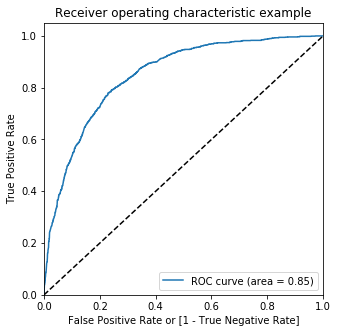

In [90]:
# Defining the function to plot the ROC curve
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

# Calling the function
draw_roc(y_train_pred_final.Churn, y_train_pred_final.Churn_Prob)

### Finding the right cutoff

In [91]:
## lets create columns of predictions with different cutoffs
numbers = [float(x)/10 for x in range(10)]

for i in numbers:
    y_train_pred_final[i] = y_train_pred_final.Churn_Prob.apply(lambda x: 1 if x>i else 0)

y_train_pred_final.head()

,Churn,Churn_Prob,CustID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.282193,879,0,1,1,1,0,0,0,0,0,0,0
1,0,0.268192,5790,0,1,1,1,0,0,0,0,0,0,0
2,1,0.689531,6498,1,1,1,1,1,1,1,1,0,0,0
3,1,0.534214,880,1,1,1,1,1,1,1,0,0,0,0
4,1,0.674332,2784,1,1,1,1,1,1,1,1,0,0,0


In [106]:
## lets calculate accuracy,sensitivity,specificity of the model at each cutoff probability
cutoff_df = pd.DataFrame(columns=['prob','accuracy','sensi(TPR)','speci','FPR'])
num = [.0,.1,.2,.3,.4,.5,.6,.7,.8,.9]

for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Churn,y_train_pred_final[i])
    total1 = sum(sum(cm1)) ## get the whole count
    accuaracy = (cm1[0,0]+cm1[1,1])/total1
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    FPR = 1 - speci
    
    cutoff_df.loc[i] = [i,accuaracy,sensi,speci,FPR]
cutoff_df

[[2793  842]
 [ 283 1004]]


,prob,accuracy,sensi(TPR),speci,FPR
0.0,0.0,0.261479,1.000000,0.000000,1.000000
0.1,0.1,0.619667,0.946387,0.503989,0.496011
0.2,0.2,0.722674,0.850039,0.677579,0.322421
0.3,0.3,0.771434,0.780109,0.768363,0.231637
0.4,0.4,0.795002,0.671329,0.838790,0.161210
0.5,0.5,0.804754,0.537685,0.899312,0.100688
0.6,0.6,0.800284,0.385392,0.947180,0.052820
0.7,0.7,0.779764,0.205128,0.983219,0.016781
0.8,0.8,0.749289,0.050505,0.996699,0.003301
0.9,0.9,0.738521,0.000000,1.000000,0.000000


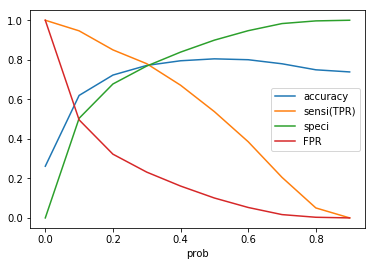

In [103]:
cutoff_df.plot.line(x='prob',y=["accuracy","sensi(TPR)","speci","FPR"])

###### at 0.3 we have less FPR and high TPR. Both sensi and specifi along with accuracy are high
###### we can choose any cutoff based on the metrics we are focussing by looking at the graph

In [104]:
# Creating new column 'predicted' with 1 if Churn_Prob > 0.3 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.3 else 0)

In [105]:
# lets print accuracy score 
print(metrics.accuracy_score(y_train_pred_final.Churn,y_train_pred_final.predicted))

0.771434376269809


In [111]:
confusion = metrics.confusion_matrix(y_train_pred_final.Churn,y_train_pred_final.predicted)
confusion

array([[2793,  842],
       [ 283, 1004]], dtype=int64)

In [112]:
# Lets look at the sensitivity
TP = confusion[1,1]
TN = confusion[0,0]
FP = confusion[0,1]
FN = confusion[1,0]
TP/float(TP+FN)

0.7801087801087802

Now we see that sensitivity went up from 57 to 77 which means now, we can identify churners more precisely

### Precision and Recall

In [113]:
precision = TP/float(TP+FP)
recall = TP/float(TP+FN)
print("precision is: ",precision)
print("recall is: ",recall)

precision is:  0.5438786565547129
recall is:  0.7801087801087802


In [117]:
### using sklearn for precision or recall
from sklearn.metrics import precision_score,recall_score,precision_recall_curve


In [115]:
precision_score(y_train_pred_final.Churn,y_train_pred_final.predicted)

0.5438786565547129

In [116]:
recall_score(y_train_pred_final.Churn,y_train_pred_final.predicted)

0.7801087801087802

### Precision-Recall Tradeoff

In [122]:
p,r,thresholds = precision_recall_curve(y_train_pred_final.Churn,y_train_pred_final.Churn_Prob)
print(p,r,thresholds)

[0.26701245 0.26697114 0.26702658 ... 1.         1.         1.        ] [1.         0.999223   0.999223   ... 0.00699301 0.004662   0.        ] [0.00595598 0.00598007 0.00603907 ... 0.85734365 0.86170814 0.86595997]


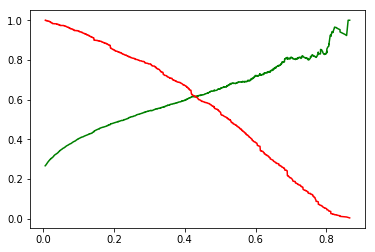

In [123]:
plt.plot(thresholds,p[:-1],'g')
plt.plot(thresholds,r[:-1],'r')
plt.show()

Acc to precision recall view, its around 0.42. But we will go with sensitivity-specificity view

## Evaluating on Test Set

In [128]:
##scale the features
X_test[['tenure','MonthlyCharges','TotalCharges']] = scaler.transform(X_test[['tenure','MonthlyCharges','TotalCharges']])

In [129]:
## use the selected features only
X_test = X_test[col]
X_test.head()

,tenure,PaperlessBilling,SeniorCitizen,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Mailed check,InternetService_Fiber optic,InternetService_No,MultipleLines_Yes,OnlineSecurity_Yes,TechSupport_Yes,StreamingTV_Yes
942,-0.347623,1,0,0,0,1,0,1,0,0,0,0,0
3730,0.999203,1,0,0,0,1,0,1,0,1,0,0,1
1761,1.040015,1,0,0,1,1,0,0,1,1,0,0,0
2283,-1.286319,1,0,0,0,0,1,1,0,0,0,0,0
1872,0.346196,0,0,0,1,0,0,0,1,0,0,0,0


In [130]:
X_test_sm = sm.add_constant(X_test)

In [131]:
y_test_pred = res.predict(X_test_sm)

In [132]:
y_test_pred.head()

942     0.397413
3730    0.270295
1761    0.010238
2283    0.612692
1872    0.015869
dtype: float64

In [140]:
y_test_pred_final = pd.DataFrame(columns=["y_test_actual","y_test_probs","y_test_predicted"])

In [141]:
## using the sensi-speci cutoff of 0.3
y_test_pred_final["y_test_actual"] = y_test
y_test_pred_final['y_test_probs'] = y_test_pred
y_test_pred_final['y_test_predicted'] = y_test_pred_final.y_test_probs.apply(lambda x: 1 if x>0.3 else 0)
y_test_pred_final.head()

,y_test_actual,y_test_probs,y_test_predicted
942,0,0.397413,1
3730,1,0.270295,0
1761,0,0.010238,0
2283,1,0.612692,1
1872,0,0.015869,0


In [142]:
## lets look at the accuracy
metrics.accuracy_score(y_test_pred_final.y_test_actual,y_test_pred_final.y_test_predicted)

0.7440758293838863

Good accuracy compared to the train set

In [144]:
confusion = metrics.confusion_matrix(y_test_pred_final.y_test_actual,y_test_pred_final.y_test_predicted)
confusion

array([[1150,  378],
       [ 162,  420]], dtype=int64)

In [145]:
# Lets look at the sensitivity
TP = confusion[1,1]
TN = confusion[0,0]
FP = confusion[0,1]
FN = confusion[1,0]
TP/float(TP+FN)

0.7216494845360825

In [146]:
## lets look at specificity
TN/float(TN+FP)

0.7526178010471204

##### we got decent sensitivity and specificity values for the cut off of 0.3 (we can use prec-recall cutoff of 0.42 as well jic)

### Methodology Followed

### Data cleaning and preparation

- Combining three dataframes
- Handling categorical variables
    - Mapping categorical variables to integers
    - Dummy variable creation
- Handling missing values

### Test-train split and scaling

### Model Building

- Feature elimination based on correlations
- Feature selection using RFE (Coarse Tuning)
- Manual feature elimination (using p-values and VIFs)

### Model Evaluation

- Accuracy
- Sensitivity and Specificity
- Optimal cut-off using ROC curve
- Precision and Recall

### Predictions on the test set

In [151]:
1050/1400

0.75

In [152]:
1190/1400

0.85

In [153]:
1050/1450

0.7241379310344828